# K-Mean Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
university=pd.read_excel(r"D:\datascience\University_Clustering.xlsx")
university

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [3]:
university.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [4]:
university.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [5]:
Univ= university.drop(["State"], axis=1)


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min()) 
    return (x)
df_norm = norm_func(Univ.iloc[:, 1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))
from sklearn.cluster import	KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
TWSS

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[4.123452442397179,
 2.9556843285735446,
 2.2308047771916275,
 1.6819375916169372,
 1.4320118047058643,
 1.3284812863891966,
 1.049650204125301]

Text(0, 0.5, 'total_within_SS')

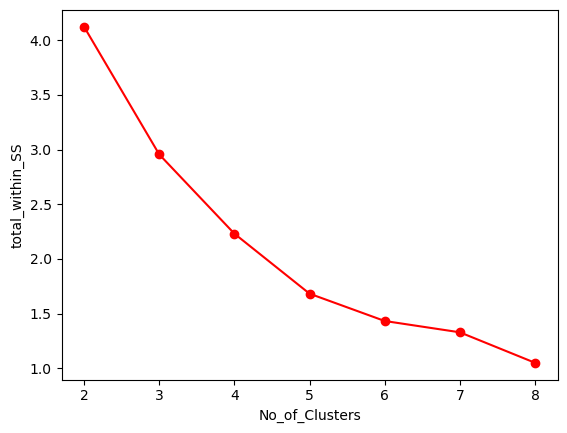

In [8]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [9]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(df_norm)
model.labels_ # getting the labels of clusters assigned to each row 


C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\reshm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1])

In [10]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust'] = mb # creating a  new column and assigning it to new column 
Univ.head()
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [11]:
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]
Univ.head()


,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,2,CMU,1260,62,59,9,25026,72
3,1,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [12]:
Univ.iloc[:, 2:8].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.75
1,1353.181818,89.090909,24.090909,10.181818,38618.727273,92.00
2,1253.000000,77.700000,43.500000,12.900000,22008.200000,86.90
